In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Titanic\Titanic-Dataset.csv")

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [15]:
data['Cabin'].fillna('Unknown', inplace=True)

In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [23]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data.duplicated().sum()

0

### Data Visualization

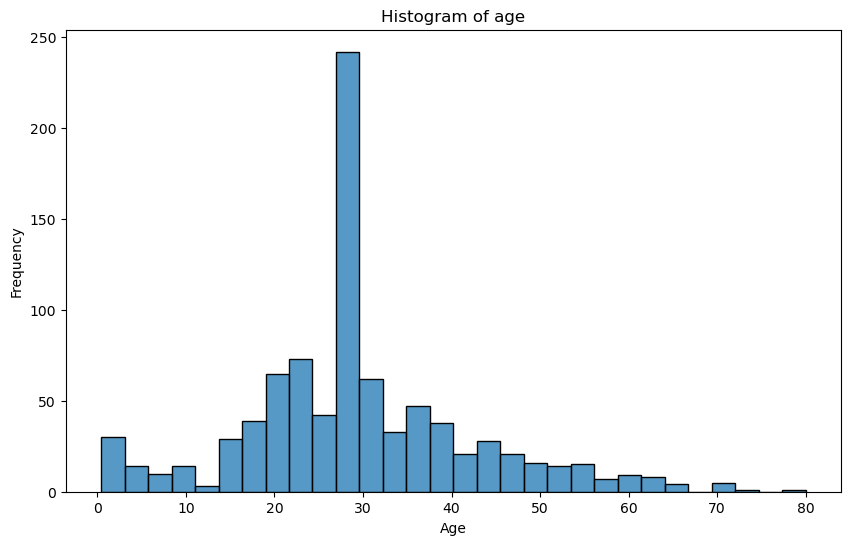

In [26]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

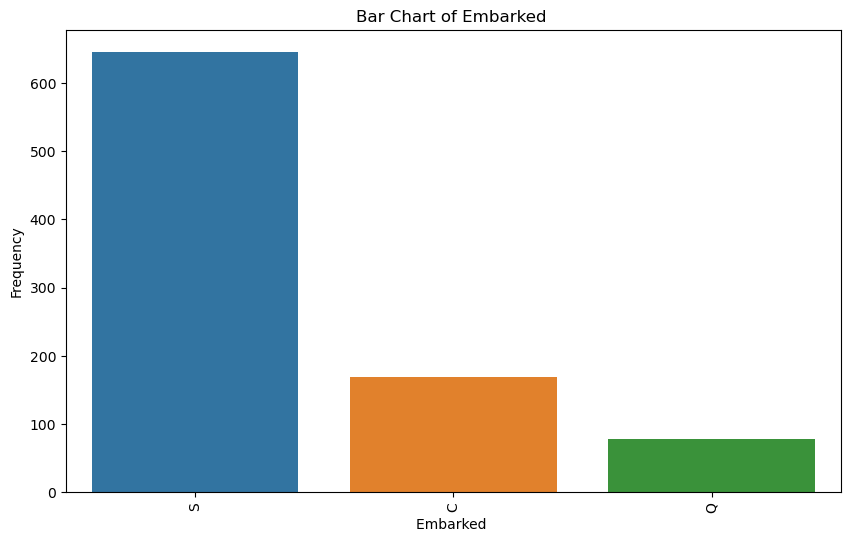

In [38]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Embarked'])
plt.title('Bar Chart of Embarked ')
plt.xlabel('Embarked ')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

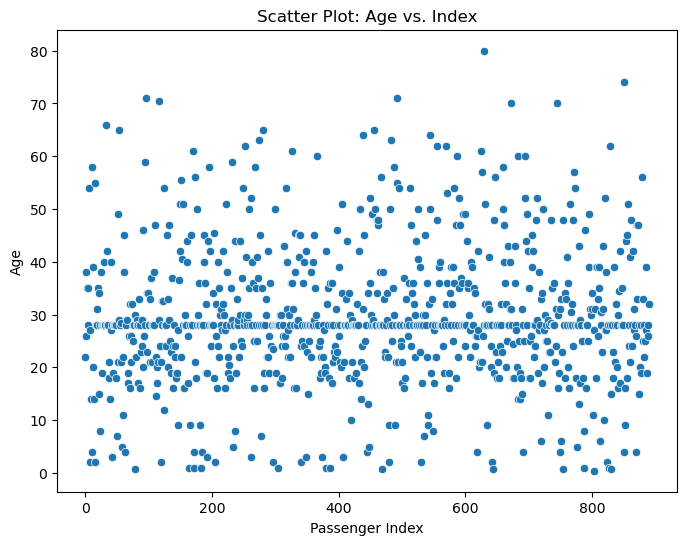

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y=data['Age'])
plt.title('Scatter Plot: Age vs. Index')
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.show()

In [46]:
df = data.copy()

In [54]:
# Convert columns to appropriate data types
df['Age'] = df['Age'].astype(float)  
df['Fare'] = df['Fare'].astype(float)  
df['SibSp'] = df['SibSp'].astype(int) 
df['Parch'] = df['Parch'].astype(int)  

df['Pclass'] = df['Pclass'].astype('category')  
df['Sex'] = df['Sex'].astype('category') 
df['Embarked'] = df['Embarked'].astype('category') 
df['Survived'] = df['Survived'].astype('category') 

df['Cabin'] = df['Cabin'].astype('category')  
df['Ticket'] = df['Ticket'].astype('object')  
df['Name'] = df['Name'].astype('object')  

In [56]:
categorical_cols = df.describe(include='category').columns
categorical_cols

Index(['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked'], dtype='object')

In [58]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in df.select_dtypes(include=['category']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [62]:
from sklearn.preprocessing import MinMaxScaler
# Select numerical columns to normalize
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [64]:
# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df['Survived']  # Target

In [66]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

Train set: (712, 7) (712,)

Test set: (179, 7) (179,)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Use 5 neighbors (you can tune this)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [20 54]]
